In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
%autosave 60

Autosaving every 60 seconds


In [2]:
data=(np.loadtxt('../Codes/Ising_model/output.txt'))
E = data[:,0]

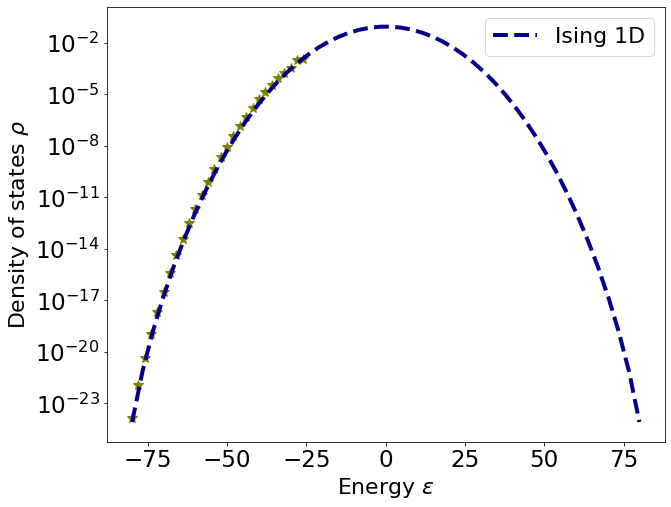

In [3]:
fig, ax = plt.subplots(figsize = (10,8))
L = 80
h = 20
ds = np.linspace(0, L );
data_E = np.histogram(E, bins = 'auto', density = True);
ax.plot(data_E[1][:-1], data_E[0]/(1e10*(2**(L))**(-1)*np.exp(-data_E[1][:-1]/1)), color = 'olive', linestyle = '', marker = '*', ms = 10);
#ax.plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);

#ax.plot(data_E[1][:-1], (2**(50))**(-1)*np.exp(-data_E[1][:-1]/1)*sc.comb(L, (data_E[1][:-1]+L)/2), color = 'olive', linestyle = '--', marker = '', ms = 10);
ax.plot(ds*2-L, sc.comb(L, ds)/2**(L) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');
ax.set_yscale('log');
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)
fig.savefig('../Figures/Density_of_States_MCMC_Ising1D_temperature.png')

In [4]:
print('%.2e'%(2**80),'%.2e'%(len(E)))

1.21e+24 8.00e+06


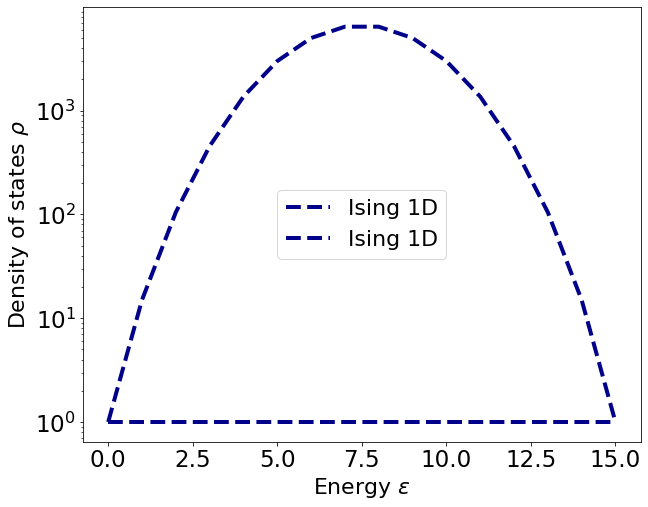

In [35]:
fig, ax = plt.subplots(figsize = (10,8))
L = 15. #Seq. lenght
d = 2 #Alphabet size
k = np.arange(L+1);
ax.plot(k, sc.comb(L, k) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');
ax.plot(k, (d-1)**k , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)


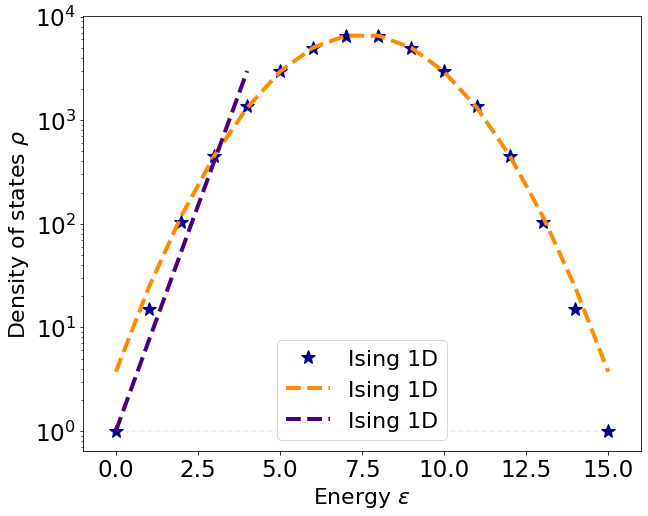

In [45]:
fig, ax = plt.subplots(figsize = (10,8))

def P0(k):
    return d**L*np.exp(-0.5*(L/2-k)**2/(0.25*L))/(np.sqrt(2*np.pi*(0.25*L))) 

ax.plot(k, sc.comb(L, k)*(d-1)**k , linewidth = 0 , label = 'Ising 1D', color = 'darkblue', linestyle = '--', marker = '*', ms = 15);

ax.plot(k, P0(k) , linewidth = 4 , label = 'Ising 1D', color = 'darkorange', linestyle = '--');

ax.plot(k[0:5], 1*np.exp((2-(4*0)/L)*k[0:5]) , linewidth = 4 , label = 'Ising 1D', color = 'indigo', linestyle = '--');

ax.hlines((d-1)**L, 0,L, linestyle = '--', alpha = .3, color = 'silver')

ax.set_xlim(-1, L+1)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)


<ipython-input-47-265c15dcb3ed>:3: RuntimeWarning: divide by zero encountered in log
  ax.plot(k, np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, (k-1))*(d-1)**(k-1)) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');


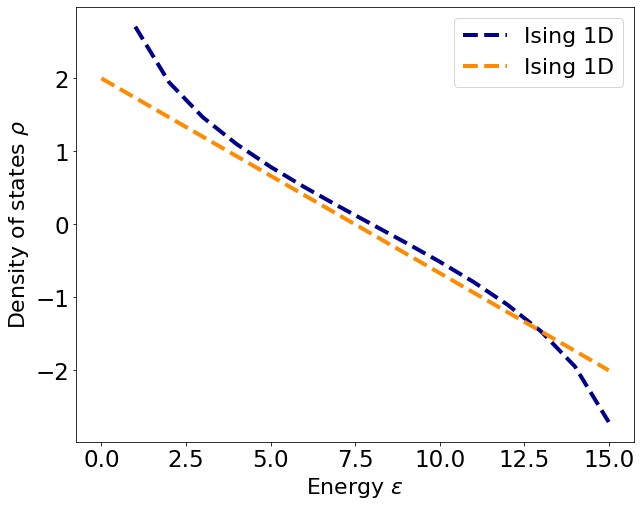

In [47]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(k, np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, (k-1))*(d-1)**(k-1)) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');

ax.plot(k, 2-(4*k)/(L), linewidth = 4 , label = 'Ising 1D', color = 'darkorange', linestyle = '--');


#ax.set_ylim(bottom = 0);
#ax.set_xlim(left = 0, right = 15);
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)


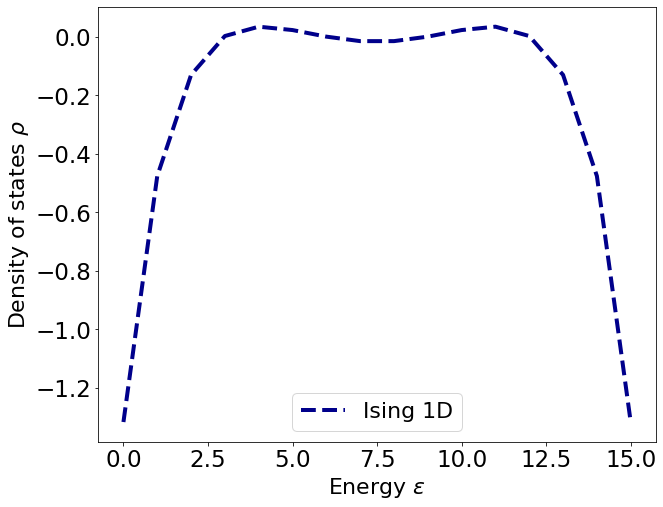

In [46]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(k, np.log((sc.comb(L, k)*(d-1)**k)/ P0(k)), linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');
#ax.plot(d,  linewidth = 4 , label = 'Ising 1D', color = 'darkorange', linestyle = '--');

#ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)
